# Experimenting with Spectral Clustering


------------------------------------------------------

*Emilie Naples*

------------------------------------------------------

##  Evaluation of the quality of the clustering
---

This notebook and mini project experiments with spectral clustering and the results on different data. It deals with toy datasets in 2D, therefore we will mostly evaluate the quality of the clusterings by visual inspection. However, quantitative assesments such as the silhouette score or other measures of compacity can be used among members of a same cluster.

The [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) is one of the metrics used to evaluate the quality of a clustering. This value is a measure of how similar is every instance to its own cluster in comparison to its similarity with other clusters.

For a particular instance $\mathbf{x}_i$, the silhouette score is computed with the following procedure:

1. Compute the $a(\mathbf{x}_i)$, that is, the average distance between $\mathbf x_i$ and all the other instances that belong to its cluster. If $\mathbf x_i$ belongs to $C_i$, and there are $N_i$ instances in $C_i$, then
$$
a(\mathbf{x}_i) = \frac{1}{N_i-1} \sum_{\mathbf{x}_j\in C_i, j \ne i} d(\mathbf{x}_i,\mathbf{x}_j)
$$

2. Compute the average distance between $\mathbf x_i$ and all the instances in **the closest cluster** to  $\mathbf x_i$. The closest cluster means that in a clustering in $K$ groups, $\mathbf x_i$ was assigned to $C_i$ but there will be a second runner up cluster $C_b$. Then
$$
b(\mathbf{x}_i) = \min_{k=1,\ldots,K \\ k \ne i} \frac{1}{N_k} \sum_{\mathbf{x}_j\in C_k}{d(\mathbf{x}_i,\mathbf{x}_j)}
$$
The minimum operator sirves to identify the second runner up cluster among all the clusters that are not the one that includes $\mathbf{x}_i$. That is, the minimum operator gets $C_b$ out of the $K-1$ clusters $C_k$ with $k=1,\ldots, K$, $k \ne i$

3. Then the silhouette score is computed as

$$ s(\mathbf{x}_i) = \frac{b(\mathbf{x}_i)-a(\mathbf{x}_i)}{\max\Big\{b(\mathbf{x}_i),a(\mathbf{x}_i)\Big\}}$$


The value of the silhouette score is in $[-1, 1]$. A score of $1$ means that $\mathbf{x}_i$ is very well represented within its group (cohesion), as it is very similar to all the members of its group and very different from the members of the other groups (separation). An score of $-1$ indicates a poor clustering, as points do not get well represented by their own clusters. Values close to 0 indicate overlapping groups.

In [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) we can obtain the average value of the score for all the points.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
n_samples = 200
random_state = 42

# Data sets
---

I evaluate the performance of three clustering methods using some of the usual clustering datasets that are easy to generate with sklearn. They are 2D toy problems in which a human expert would easily define clusters by visual inspection.

This first section of the notebook consists in a description of the datasets and a quick clustering using K means to gain insight about the difficulties that the clustering methods might find.

## Three Blobs

Start with a sample to evaluate data set formed by three blobs.

I measure the K means quality with the sum of distances of every training sample to the centroid of its cluster.

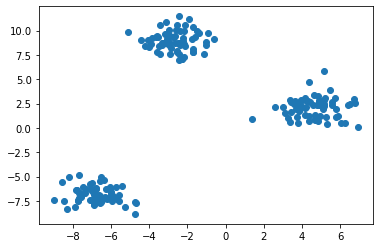

In [ ]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)
plt.figure()
plt.scatter(blobs[0][:,0], blobs[0][:,1])

Run K means with K=2, 3, 4 and 5 in the blobs data set. And plot the clusters found.

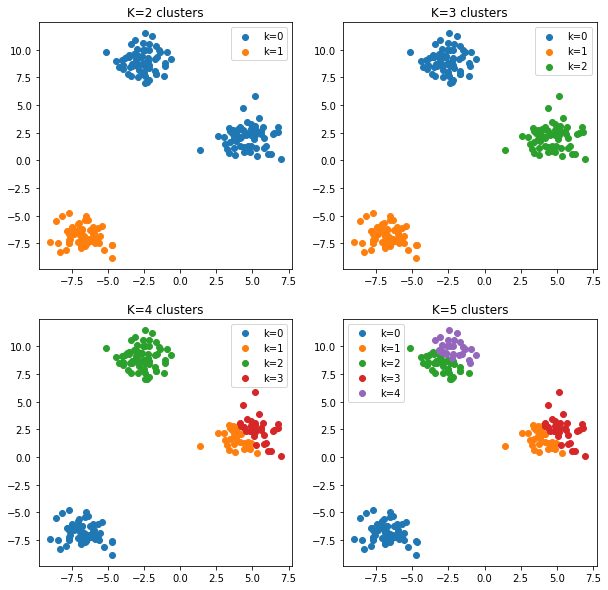

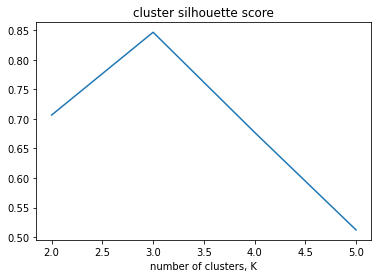

In [ ]:
from sklearn.metrics import silhouette_score

nrows=2
ncols=2
ff,aa = plt.subplots(nrows, ncols,figsize=(10,10))
v_K = [2,3,4,5]
ikk = 0
SC  = np.empty(len(v_K))
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[ikk]
        clustering = KMeans(n_clusters=K, random_state=random_state).fit(blobs[0])
        labels = clustering.predict(blobs[0])
        SC[ikk] = silhouette_score(blobs[0],labels)

        for k in range(K):
            idx_k = np.where(labels == k)[0]
            aa[rr][cc].scatter(blobs[0][idx_k,0], blobs[0][idx_k,1], label='k={0:d}'.format(k))
        ikk += 1
        aa[rr][cc].set_title('K={} clusters'.format(K))
        aa[rr][cc].legend()
plt.figure()
plt.plot(v_K, SC)
_=plt.title('cluster silhouette score')
_=plt.xlabel('number of clusters, K')


## Skinny Blobs

The next dataset is a variation of the former one in which the blobs suffer a transformation that makes them look skinnier.


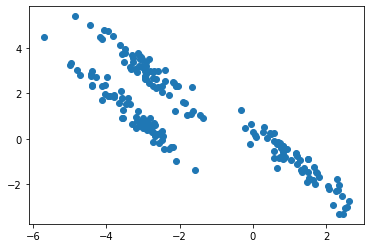

In [ ]:
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_skinny_blobs = np.dot(X, transformation)
skinny_blobs = (X_skinny_blobs, y)
plt.figure()
plt.scatter(skinny_blobs[0][:,0], skinny_blobs[0][:,1])

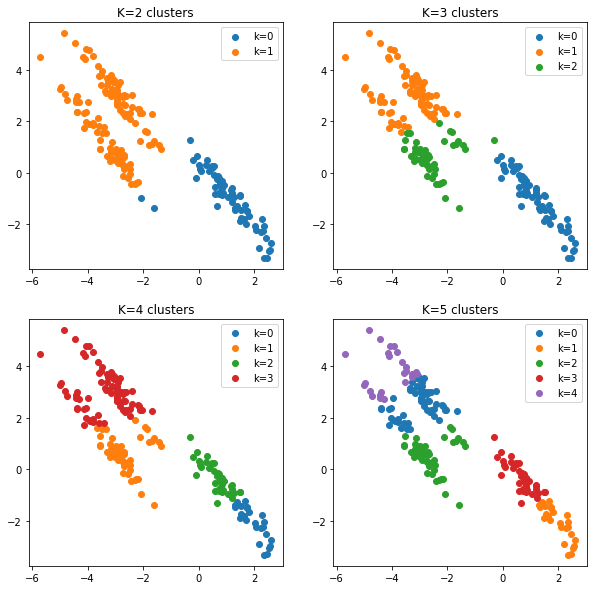

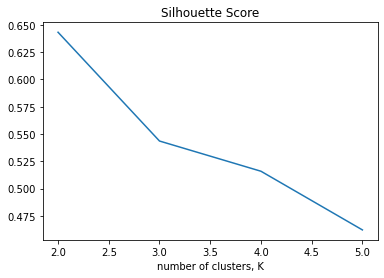

In [ ]:
"""
I repeat the analysis of the three blobs with the skinny blobs
"""
XX = X_skinny_blobs.copy()
nrows=2
ncols=2
ff,aa = plt.subplots(nrows, ncols,figsize=(10,10))
v_K = [2,3,4,5]
ikk = 0
SC = np.empty(len(v_K))
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[ikk]
        clustering = KMeans(n_clusters=K, random_state=random_state).fit(XX)
        labels = clustering.predict(XX)
        SC[ikk] = silhouette_score(XX,labels)

        for k in range(K):
            idx_k = np.where(labels == k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))
        ikk += 1
        aa[rr][cc].set_title('K={} clusters'.format(K))
        aa[rr][cc].legend()
plt.figure()
plt.plot(v_K, SC)
_=plt.title('Silhouette Score')
_=plt.xlabel('number of clusters, K')

## Concentric circunferences

The third data set is a classic one in the motivation of spectral clustering over regular Kmeans with euclidean distance. It seems to be the classic situation begging for a kernel analysis...

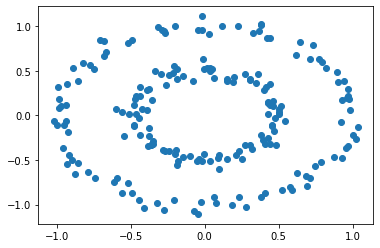

In [ ]:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
plt.figure()
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1])

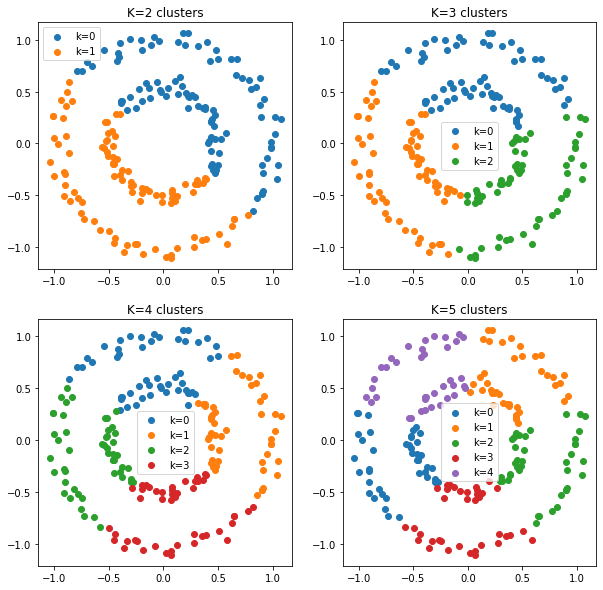

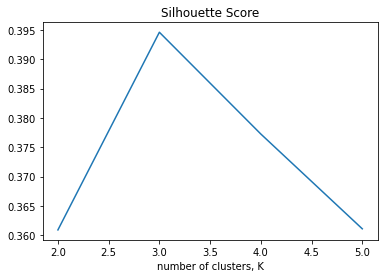

In [ ]:
XX = noisy_circles[0].copy()
nrows=2
ncols=2
ff,aa = plt.subplots(nrows, ncols,figsize=(10,10))
v_K = [2,3,4,5]
ikk = 0
SC = np.empty(len(v_K))
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[ikk]
        clustering = KMeans(n_clusters=K, random_state=random_state).fit(XX)
        labels = clustering.predict(XX)
        SC[ikk] = silhouette_score(XX,labels)

        for k in range(K):
            idx_k = np.where(labels == k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))
        ikk += 1
        aa[rr][cc].set_title('K={} clusters'.format(K))
        aa[rr][cc].legend()
plt.figure()
plt.plot(v_K, SC)
_=plt.title('Silhouette Score')
_=plt.xlabel('number of clusters, K')

# Kernel KMeans

The first method to test is the kernel version of KMeans. There is no sklearn version of kernel KMeans, so needing to code a little bit in order to get the implementation.

The first step is the implementation of the rbf kernel. Code a function that returns matrix K given two input arrays
$$ K[i,j] = \exp\left ( -\gamma\|\mathbf x_i - \mathbf z_j\|^2 \right )$$
where $\mathbf x_i$ is the $i$-th row of the first argument of the function and $\mathbf z_j$ is the $j$-th row of the 2nd argument.

Second step is the coding of the kernel Kmeans algorithm

In [ ]:
def kernel_Kmeans_Clustering(K, n_clusters=2):
    """
    Implements kernel Kmeans Clustering
    input:
    K: 2 dim np.array with kernel matrix
    n_clusters: number of clusters
    output:
    labels: np.array with the label of each row of the kernel matrix
    """
    n = X.shape[0]
    labels = -np.ones(n) # initialization
    idx_k = np.random.permutation(n)[:n_clusters]
    for jj in range(n_clusters):
        labels[idx_k[jj]] = jj # the centroid of cluster jj is pattern with id
                           # idx_k[jj]
                           # np.where(labels==kk)[0] retrieves members of
                           # cluster kk
    """
    - Loop until convergence or maximum number of iterations reached:
    - Compute norm of each cluster center
    - Assign samples a clusters computing the distance in Feature Space
    - Check if cluster membership has changed or maximum number of iterations
      has been reached
    """

    for iter in range(10):
        labels_old = labels.copy() # to compare label assignment
        CTC = np.zeros(n_clusters)
        for kk in range(n_clusters):
            id_members_cluster_k = np.where(labels==kk)[0]
            CTC[kk] = np.mean(K[id_members_cluster_k, id_members_cluster_k])

        for ii in range(n):
            closest_prototype = -1
            kernel_to_centroid = 1e300
            for kk in range(n_clusters):
                id_members_cluster_k = np.where(labels==kk)[0]
                kernel = CTC[kk] + K[ii,ii] - 2*np.mean(K[ii, id_members_cluster_k])
                if kernel < kernel_to_centroid:
                    closest_prototype = kk
                    kernel_to_centroid = kernel
            labels[ii] = closest_prototype
        diff_centroids = np.sum(np.absolute(labels-labels_old))
        if (diff_centroids ==0):
            break
    return labels

Finally, I need a function that computes the dispersion of the clustering to asses its quality. The dispersion is the sum of distances between all the pairs of samples that are in the same cluster.

In [ ]:
def compute_dispersion(X, labels):
    unique_labels = np.unique(labels)
    dispersion = 0
    X2 = np.sum(X**2,1)
    for k in unique_labels:
        idx_members_cluster_k = np.where(labels==k)[0]
    for idi, ii in enumerate(idx_members_cluster_k[:-1]):
        xi = X[ii,:]
        for jj in idx_members_cluster_k[idi+1:]:
            xj = X[jj,:]
            dispersion += np.sqrt((X2[ii] + X2[jj] - 2*xi.dot(xj.T)))
    return dispersion

## Blobs data set

NOw get the performance of Kernel Kmeans in the three blobs data set. First produce a 4x4 subplot with the clusterings for the following values of K and $\gamma$:

$$K\in \{2, 3, 4, 5\}$$
$$ \gamma \in \{.01, .1, 1, 10 \}$$

Note the ability of kernel Kmeans to capture the clusters in this geometrical configuration with respect to that of regular K means.

gamma=0.01, dispersion=3306.02, K=2
gamma=0.10, dispersion=53218.85, K=2
gamma=1.00, dispersion=4056.41, K=2
gamma=10.00, dispersion=2400.24, K=2
gamma=0.01, dispersion=3306.02, K=3
gamma=0.10, dispersion=3306.02, K=3
gamma=1.00, dispersion=3817.64, K=3
gamma=10.00, dispersion=773.50, K=3
gamma=0.01, dispersion=682.79, K=4
gamma=0.10, dispersion=527.17, K=4
gamma=1.00, dispersion=1342.28, K=4
gamma=10.00, dispersion=763.35, K=4
gamma=0.01, dispersion=3306.02, K=5
gamma=0.10, dispersion=4056.41, K=5
gamma=1.00, dispersion=338.15, K=5
gamma=10.00, dispersion=2094.89, K=5


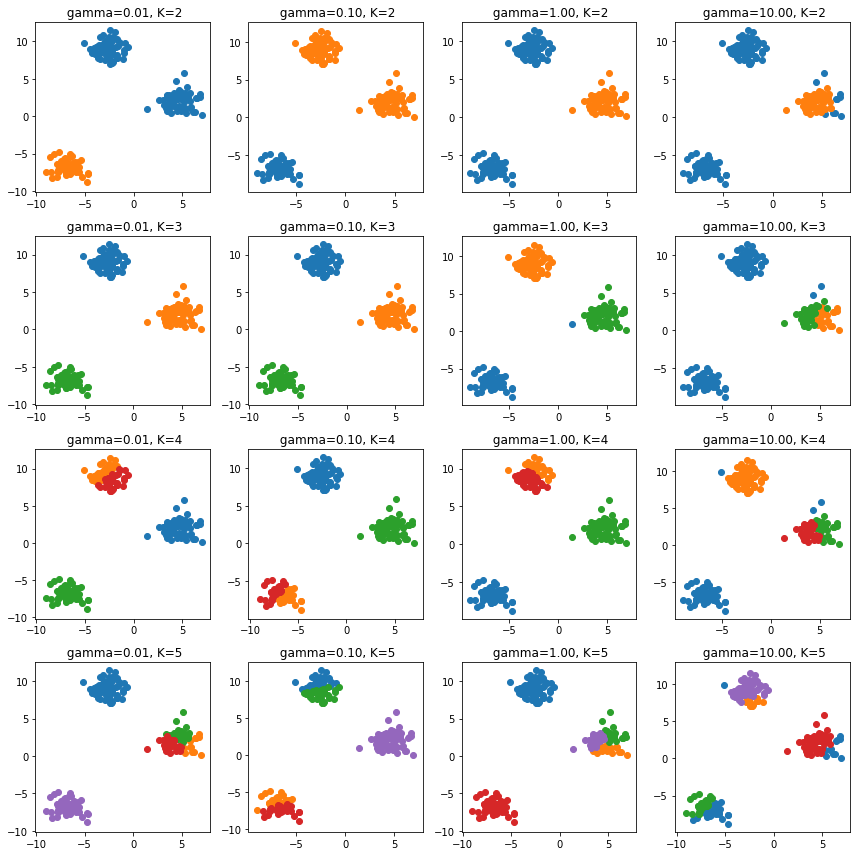

In [ ]:
XX = blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 10]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        A = rbf_kernel(XX,gamma=gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.2f}, K={1:d}'.format(gamma,K))


ff.tight_layout()
for rr in range(nrows):
    for cc in range(ncols):
        print("gamma={0:.2f}, dispersion={1:.2f}, K={2:d}".format(v_gamma[cc],
                                                                  dispersion[rr,cc],
                                                                  mK[rr,cc]))



Now, fixing $K=3$, explore the ranges of $\gamma$ that actually retrieve 3 clusters. Take note of the sensitiveness of the clustering with respect to the values of $\gamma$.

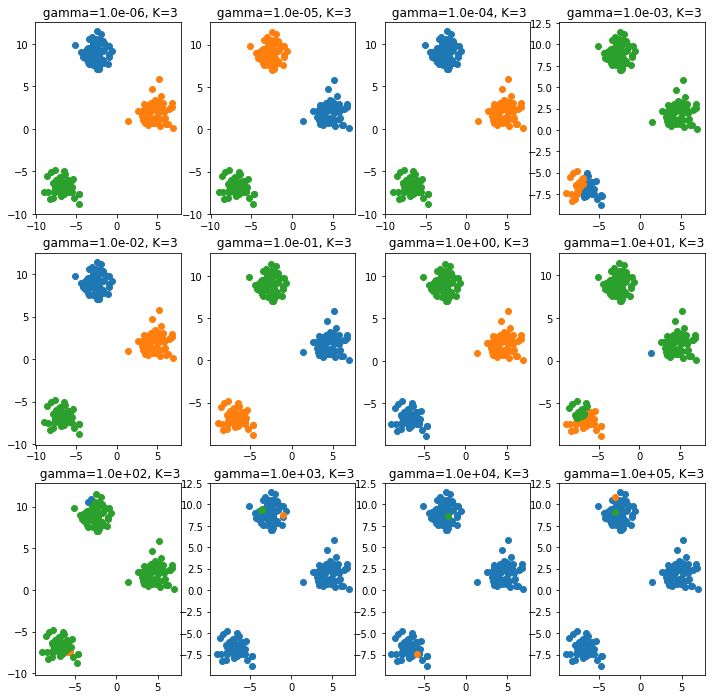

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 3
v_gamma = [1e-6,1e-5, 1e-4,.001, .01, .1, 1, 10, 100, 1e3, 1e4, 1e5]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))

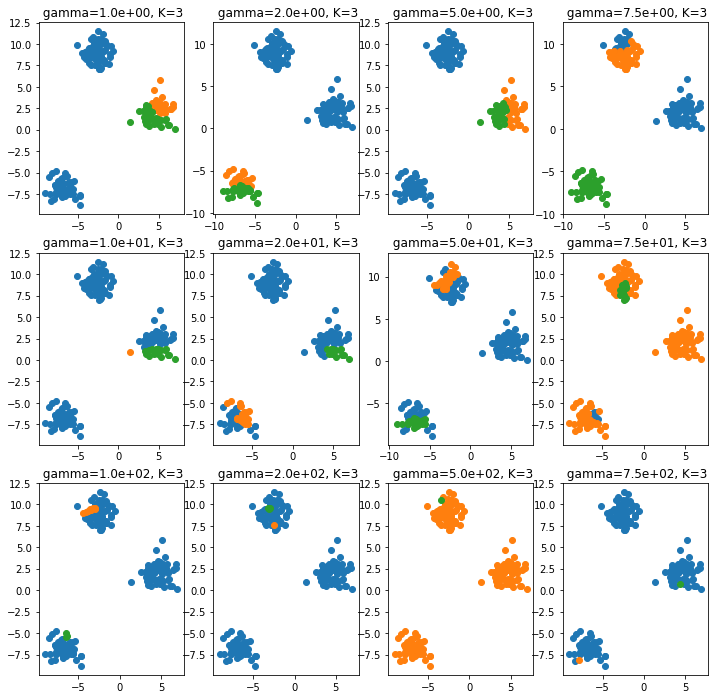

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 3
v_gamma = [1, 2, 5, 7.5, 10, 20, 50, 75, 100, 200, 500, 750]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))



## Skinny Blobs data set

Now I repeat the analysis and discussions for the skinny blobs data set. How appropriate is the rbf to capture this clustering structure?

gamma=0.01, dispersion=3676.92, K=2
gamma=0.10, dispersion=3450.80, K=2
gamma=1.00, dispersion=16877.78, K=2
gamma=10.00, dispersion=5263.99, K=2
gamma=0.01, dispersion=1878.07, K=3
gamma=0.10, dispersion=1592.31, K=3
gamma=1.00, dispersion=2205.37, K=3
gamma=10.00, dispersion=15887.57, K=3
gamma=0.01, dispersion=1282.10, K=4
gamma=0.10, dispersion=1458.10, K=4
gamma=1.00, dispersion=3673.31, K=4
gamma=10.00, dispersion=2497.49, K=4
gamma=0.01, dispersion=332.15, K=5
gamma=0.10, dispersion=154.68, K=5
gamma=1.00, dispersion=1018.20, K=5
gamma=10.00, dispersion=294.58, K=5


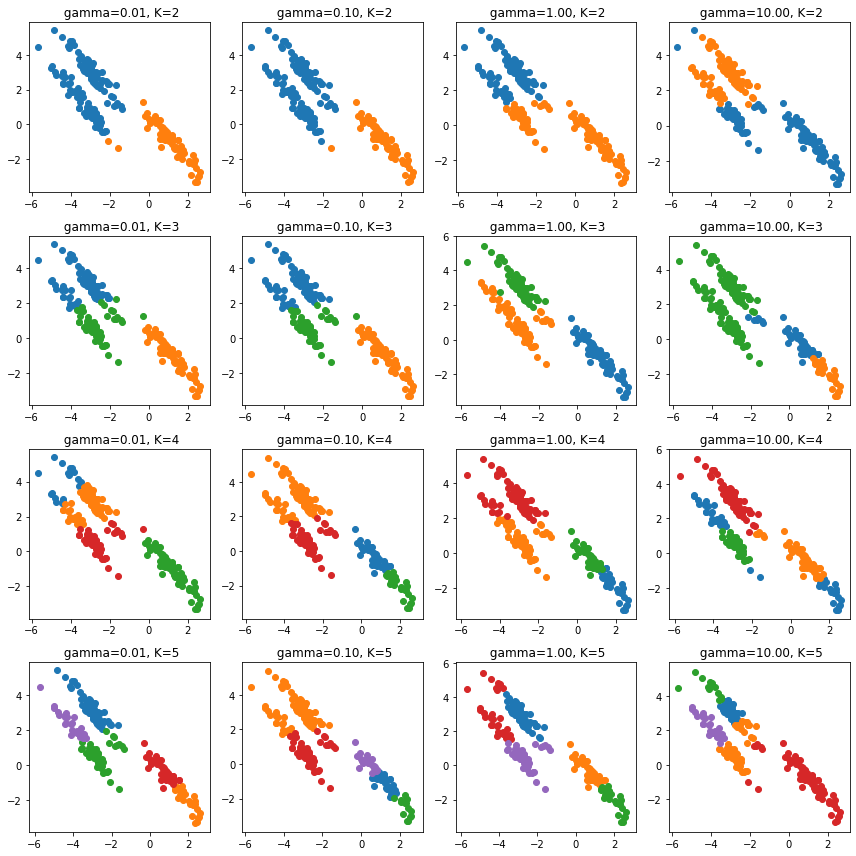

In [ ]:
XX = skinny_blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 10]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.2f}, K={1:d}'.format(gamma,K))


ff.tight_layout()
for rr in range(nrows):
    for cc in range(ncols):
        print("gamma={0:.2f}, dispersion={1:.2f}, K={2:d}".format(v_gamma[cc],
                                                                  dispersion[rr,cc],
                                                                  mK[rr,cc]))

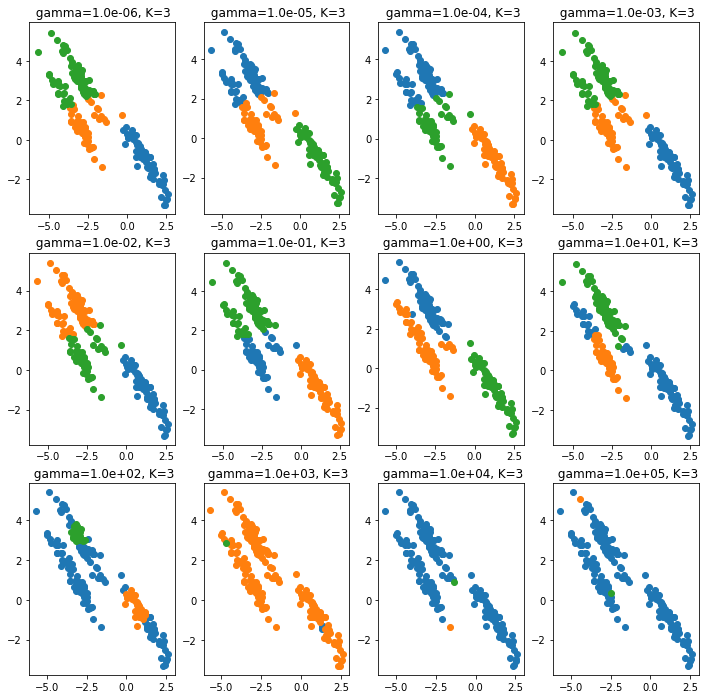

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 3
v_gamma = [1e-6,1e-5, 1e-4,.001, .01, .1, 1, 10, 100, 1e3, 1e4, 1e5]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))



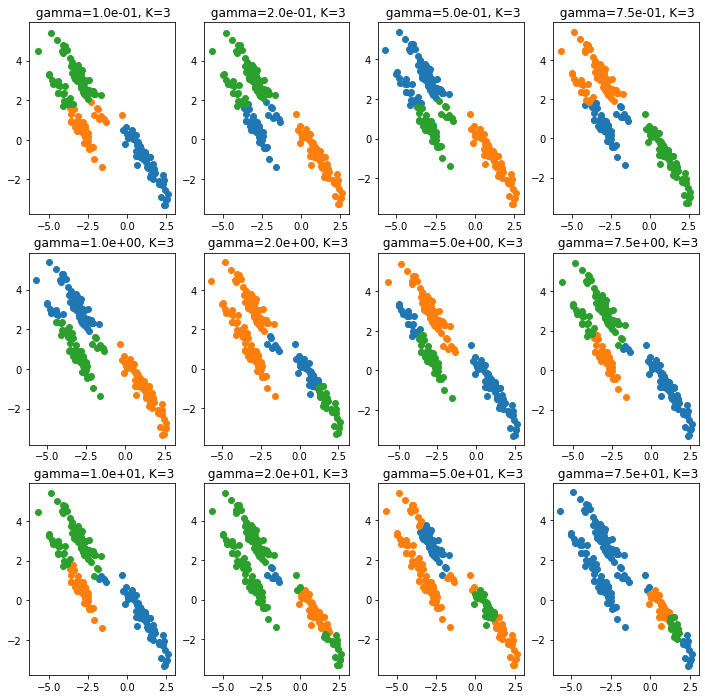

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 3
v_gamma = [.1, .2, .5, .75, 1, 2, 5, 7.5, 10.0, 20.0, 50.0, 75.0]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))


## Concentric circumferences data

Finally I repeat the analysis with the concentric circumferences data.

gamma=0.01, dispersion=4045.01, K=2
gamma=0.10, dispersion=3879.33, K=2
gamma=1.00, dispersion=4408.77, K=2
gamma=10.00, dispersion=3113.70, K=2
gamma=0.01, dispersion=1316.11, K=3
gamma=0.10, dispersion=1396.53, K=3
gamma=1.00, dispersion=1203.60, K=3
gamma=10.00, dispersion=1827.87, K=3
gamma=0.01, dispersion=658.62, K=4
gamma=0.10, dispersion=543.11, K=4
gamma=1.00, dispersion=672.15, K=4
gamma=10.00, dispersion=850.23, K=4
gamma=0.01, dispersion=328.41, K=5
gamma=0.10, dispersion=304.92, K=5
gamma=1.00, dispersion=264.48, K=5
gamma=10.00, dispersion=489.57, K=5


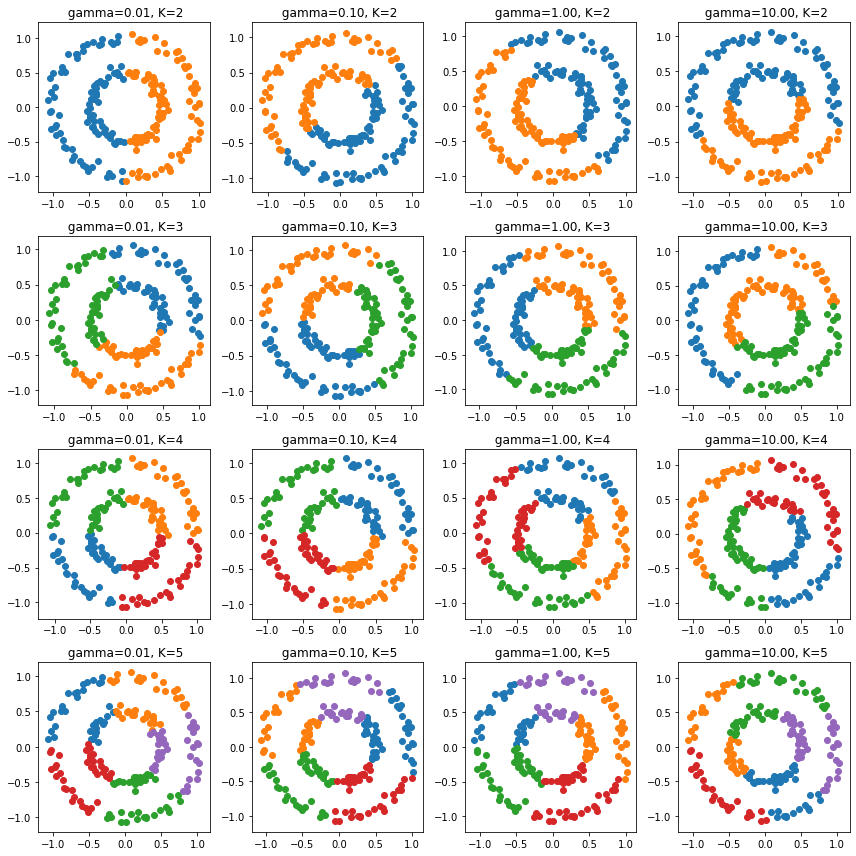

In [ ]:
XX = noisy_circles[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 10]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.2f}, K={1:d}'.format(gamma,K))


ff.tight_layout()
for rr in range(nrows):
    for cc in range(ncols):
        print("gamma={0:.2f}, dispersion={1:.2f}, K={2:d}".format(v_gamma[cc],
                                                                  dispersion[rr,cc],
                                                                  mK[rr,cc]))



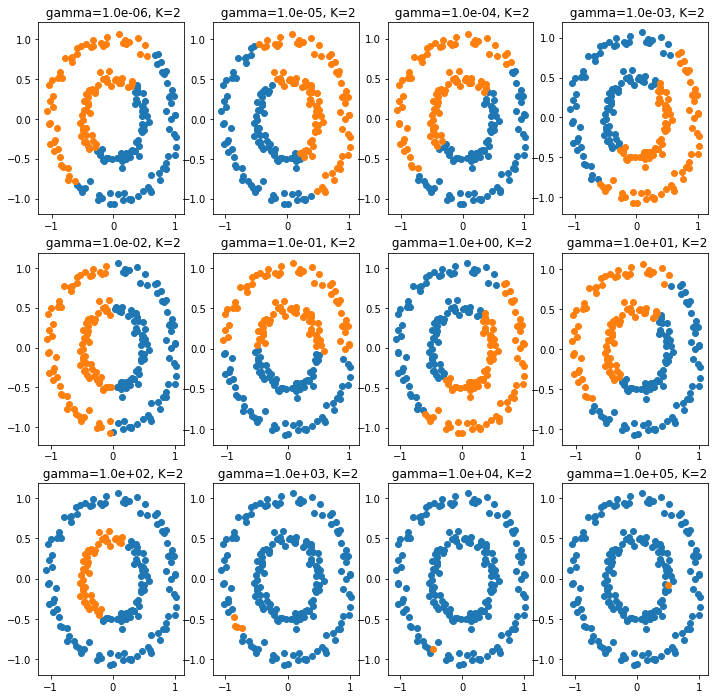

In [ ]:
K=2
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))

v_gamma = [1e-6,1e-5, 1e-4,.001, .01, .1, 1, 10, 100, 1e3, 1e4, 1e5]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))



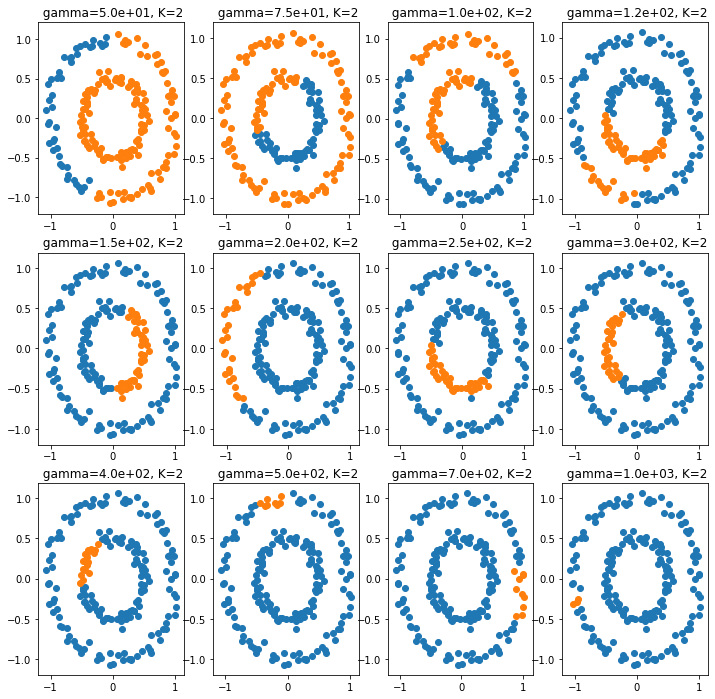

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 2
v_gamma = [50.0, 75.0, 100, 125, 150, 200, 250, 300, 400, 500, 700, 1000]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        y_pred = kernel_Kmeans_Clustering(K=A, n_clusters=K)
        mK[rr,cc] = len(np.unique(y_pred))
        dispersion[rr,cc] = compute_dispersion(XX, y_pred)
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))


# Spectral Clustering from sklearn

In the case of Spectral Clustering we can use the implementation of scikit learn. [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)

In [ ]:
from sklearn.cluster import SpectralClustering

## Three Blobs

I evaluate the performance of Spectral Clustering with an RBF kernel in the three blobs data set, first producing a 4x4 subplot with the clusterings for the following values of K and $\gamma$:

$$K\in \{2, 3, 4, 5\}$$
$$ \gamma \in \{.01, .1, 1, 5 \}$$

Noting the ability of Spectral Clustering to capture the clusters in this geometrical configuration with respect to that of regular K means.



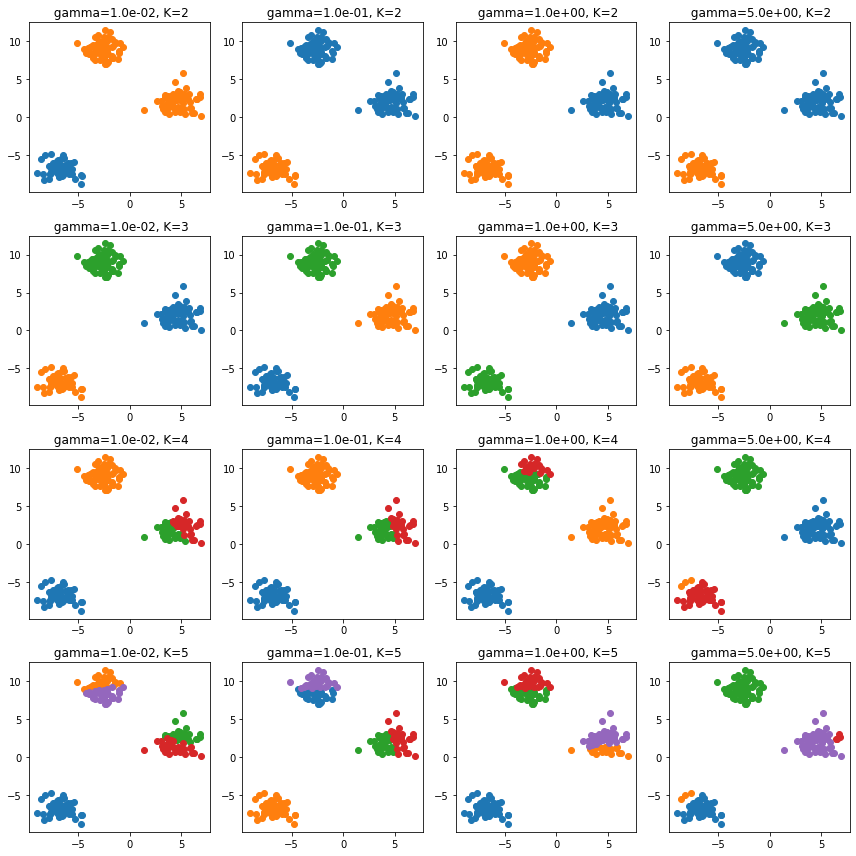

In [ ]:
XX = blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 5]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))

ff.tight_layout()

## Skinny Blobs

Repeating the analysis for the values of $\gamma$ and number of clusters.

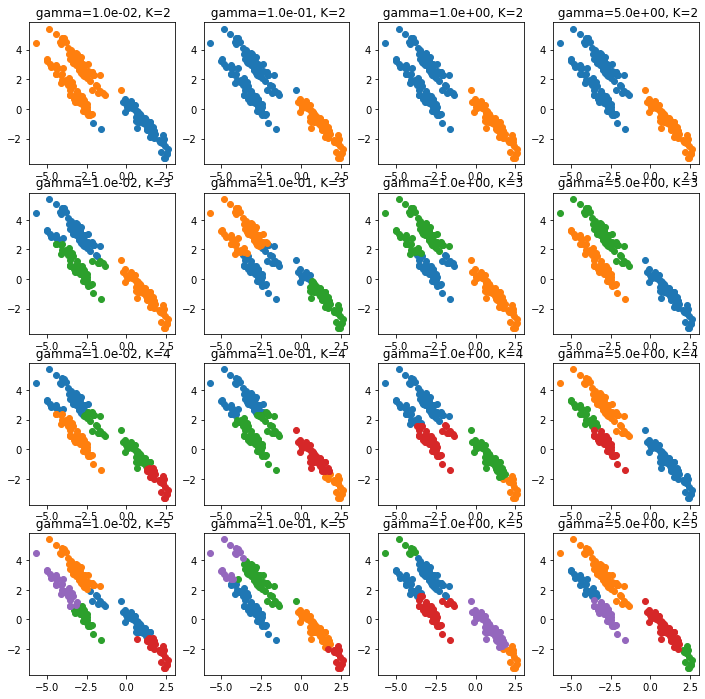

In [ ]:
XX = skinny_blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 5]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))



Might need to refine `gamma` a bit.

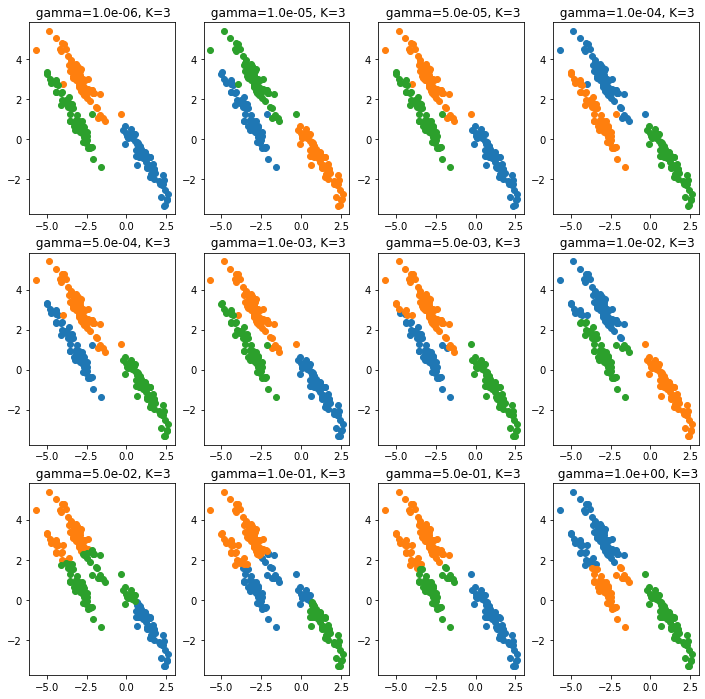

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 3
v_gamma = [1e-6,1e-5, 5e-5, 1e-4, 5e-4, .001, .005, .01, .05, .1, .5, 1,]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))

## Concentric circunferences


I repeat the analysis for the values of $\gamma$ and number of clusters.

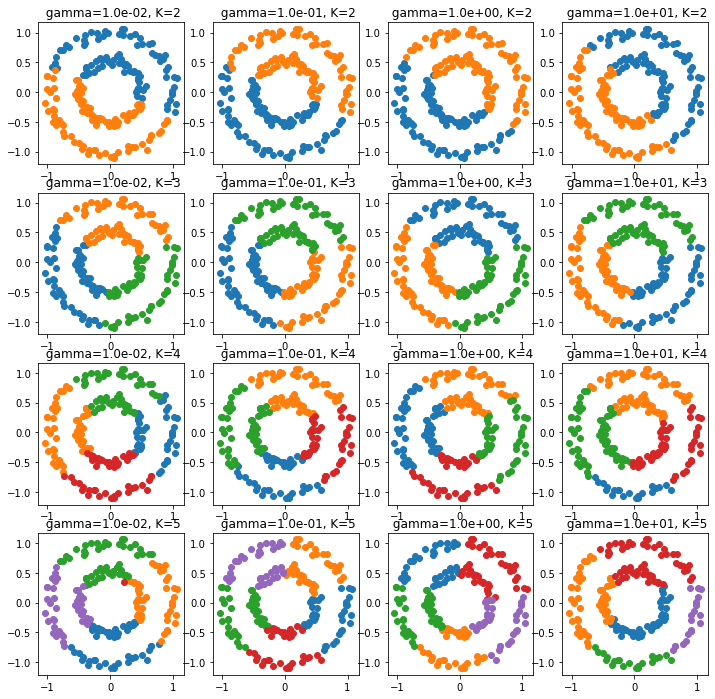

In [ ]:
XX = noisy_circles[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 10]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))



Let's see what values for `gamma` we might need to explore?

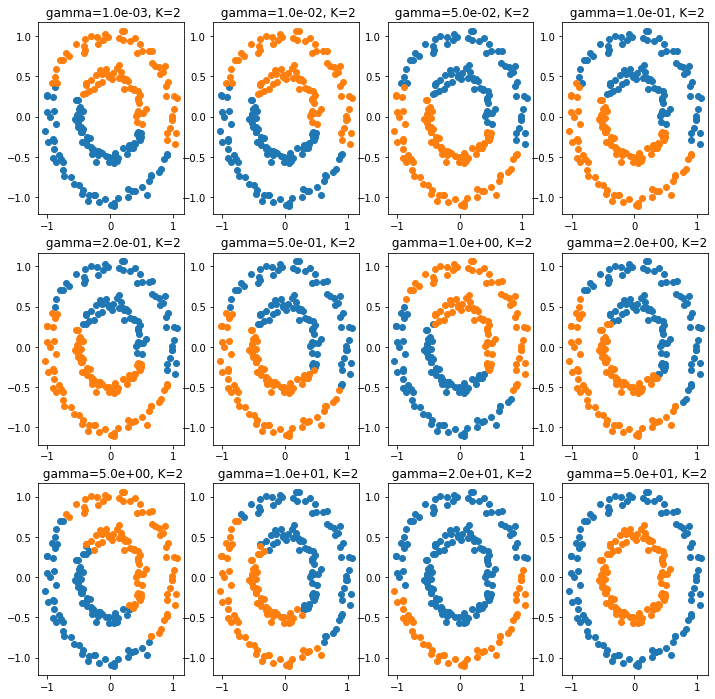

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 2
v_gamma = [.001, .01, .05, .1, .2, .5, 1,2,5,10,20,50]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))


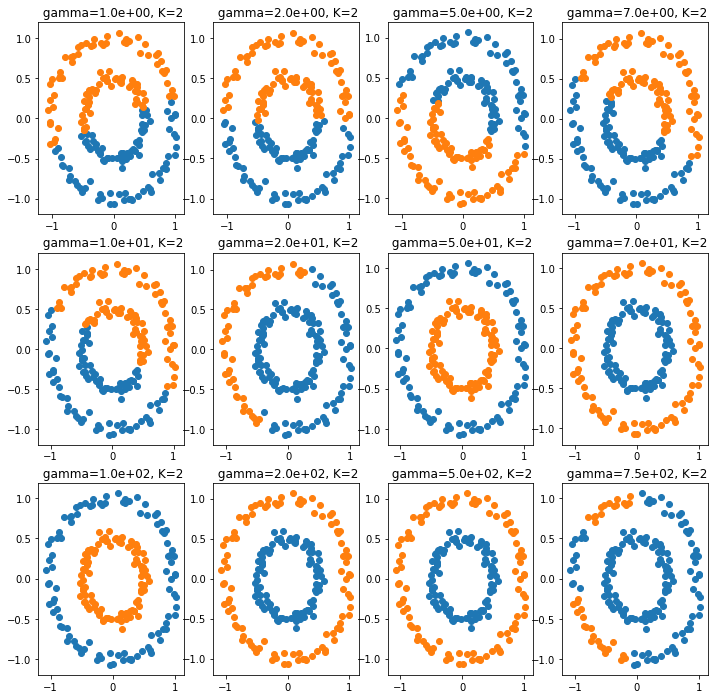

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 2
v_gamma = [1, 2, 5, 7, 10, 20, 50, 70, 100, 200, 500, 750]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):

        gamma = v_gamma[ig]
        ig +=1
        A = rbf_kernel(XX,XX,gamma)
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(XX)
        y_pred = clustering.labels_
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))


# Learning Prototypes

The last algorithm I will explore is "Learning Prototypes". Here the spectral clustering is regarded as travellers jumping from one node of the graph to another with probabilities of jump proportional to the kernel between the samples that correspond to each node.

This algorithm isn't implemented in sklearn, so the first step is the calculus of the Kullback-Leibler divergence between two arrays of $D$ elements. These arrays represent discrete probabilities (positive components that add up to 1)

$$ KL(P||Q) = \sum_{d=1}^DP_d\log\frac{P_d}{Q_d}$$

In [ ]:
def div_kl(P, Q):
    """
    - be careful to detect elements in Q that are equal to 0. Assign them to 1e-6
    and re-scale Q to add up to 1.
    """
    minim = 1e-6
    idx_Q_0 = np.where(Q==0)[0]
    if len(idx_Q_0) > 0:
        Q[idx_Q_0] = minim
        sumQ = np.sum(Q)
        Q = Q/sumQ
    idx_P_0 = np.where(P==0)[0]
    if len(idx_P_0) > 0:
        P[idx_P_0] = minim
        sumP = np.sum(P)
        P = P/sumP
    return P.dot(np.log(P/Q))


Next step is to code the clustering assignment. We start assumming we have computed $P^M$ somewhere else and just focus on the clustering of the rows of $P^M$

In [ ]:
def Learning_Prototypes_Clustering(PM, n_clusters=2):
    n = PM.shape[0]
    labels = -np.ones(n)
    Q = np.empty((n_clusters,n)) # to store prototypes
    """
    - initialize labels at random
    - initialize Q in agreement with the labels
    - Loop:
    - assign rows of PM to clusters (with Q_old recompute labels)
    - recompute prototypes (with the new labels, recompute Q)
    - check discrepancies between Q_old and Q or labels_old and labels
      and stop if convergence
    """
    idx_k = np.random.permutation(n)[:n_clusters]
    Q = PM[idx_k,:].copy()

    for kk in range(n_clusters):
        labels[idx_k[kk]] = kk
    for iter in range(10):
        Qold = Q.copy()
        labels_old = labels.copy()
        for ii in range(n):
            closest_prototype = -1
            div_to_centroid = 1e300
            for kk in range(n_clusters):
                div_to_q = div_kl(PM[ii,:], Qold[kk,:])
                if div_to_q < div_to_centroid:
                    closest_prototype = kk
                    div_to_centroid = div_to_q
            labels[ii] = closest_prototype
        diff_centroids = 0
        for kk in range(n_clusters):
            idx_members_cluster_k = np.where(labels==kk)[0]
            Q[kk,:] = np.mean(PM[idx_members_cluster_k,:],0)
            diff_centroids += div_kl(Q[kk,:], Qold[kk,:])
        if (diff_centroids < 1e-4):
            break
    return labels, Q

One last detail, we need to provide the Learning Prototypes block of code with $P^M$. Now we are coding a function that gets as input the data in input space, $\gamma$ for the rbf kernel and the number of traveller iterations $M$ and output $P^M$. Notice
$$P^M= P\times P\times P\cdots P \qquad M\mbox{ times}$$

In [ ]:
def compute_P_M(X, M, gamma = 1.0):
    n = X.shape[0]
    PM = np.empty((n,n))
    """
    - compute affinity matrix calling rbf_kernel and zeroing the diagonal
    - get P as the row-wise normalized affinith matrix (its rows sum up to one)
    - multiply P by itself M-1 times (notice P^2 means multiply P by P once)
    """
    A = rbf_kernel(X, X, gamma=gamma) - np.eye(n)
    sumA = A.sum(1)
    P = A / np.tile(sumA.reshape(n,1), (1,n))
    PM = P.dot(P) #P^2    P*P is not P^2, this is P**2
    for m in range(M-2):
        PM = P.dot(PM)
    return PM

## Blobs data set

Analyze the performance of the Learning Prototypes Algorithm in this data set. Notice the analisys needs to introduce a new dimension, $M$, the number of travelling iterations. For the first set of subplots fix $\gamma$ to some reasonable value (look at the results of spectral clustering) and vary $M$ in the range

$$ M\in\{2,10,50,100\}$$

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

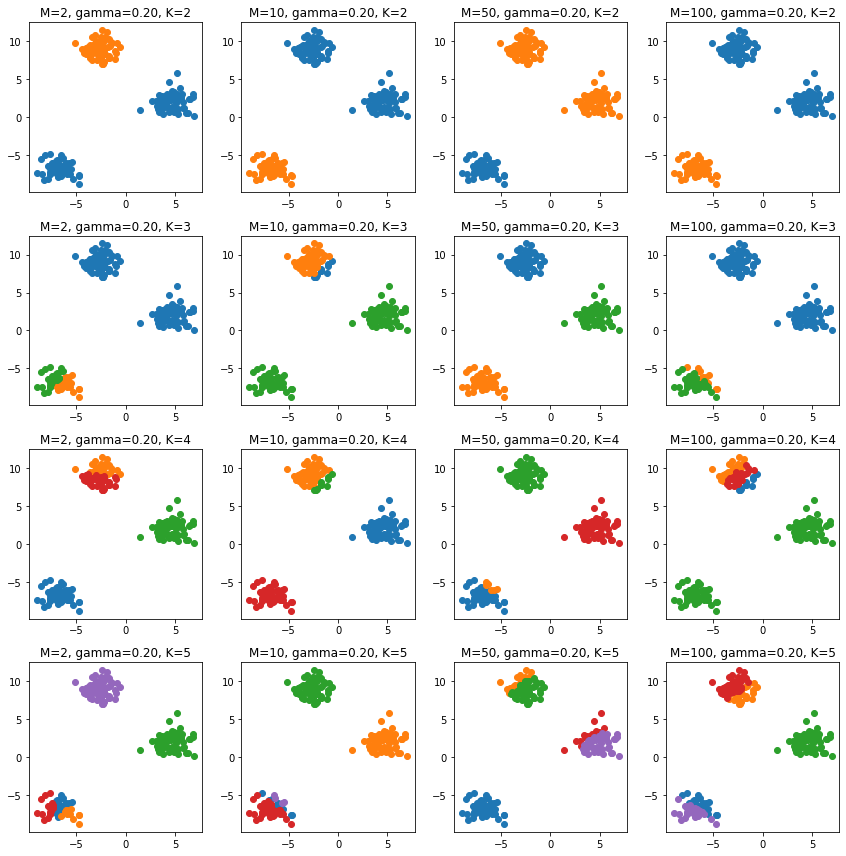

In [ ]:
XX = blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_M = [2,10,50,100]
gamma = 0.2


mK = np.empty((len(v_K), len(v_M)),dtype=int)
for rr in range(nrows):
  for cc in range(ncols):
    K = v_K[rr]
    M = v_M[cc]
    PM = compute_P_M(XX, M=M, gamma = gamma)
    labels_, Q = Learning_Prototypes_Clustering(PM, n_clusters=K)
    y_pred = labels_
    mK[rr,cc] = len(np.unique(y_pred))

    for k in range(K):
      idx_k = np.where(y_pred==k)[0]
      aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))


    aa[rr][cc].set_title('M={0:d}, gamma={1:.2f}, K={2:d}'.format(M,gamma,K))

    #aa[rr][cc].legend()
ff.tight_layout()

For the next analysis, I fix the number of clusters to the right one and explore the ranges of $\gamma$ and $M$ that retrieve reasonable clusterings.

## Skinny Blobs

Repeat the analysis with the other dataset.

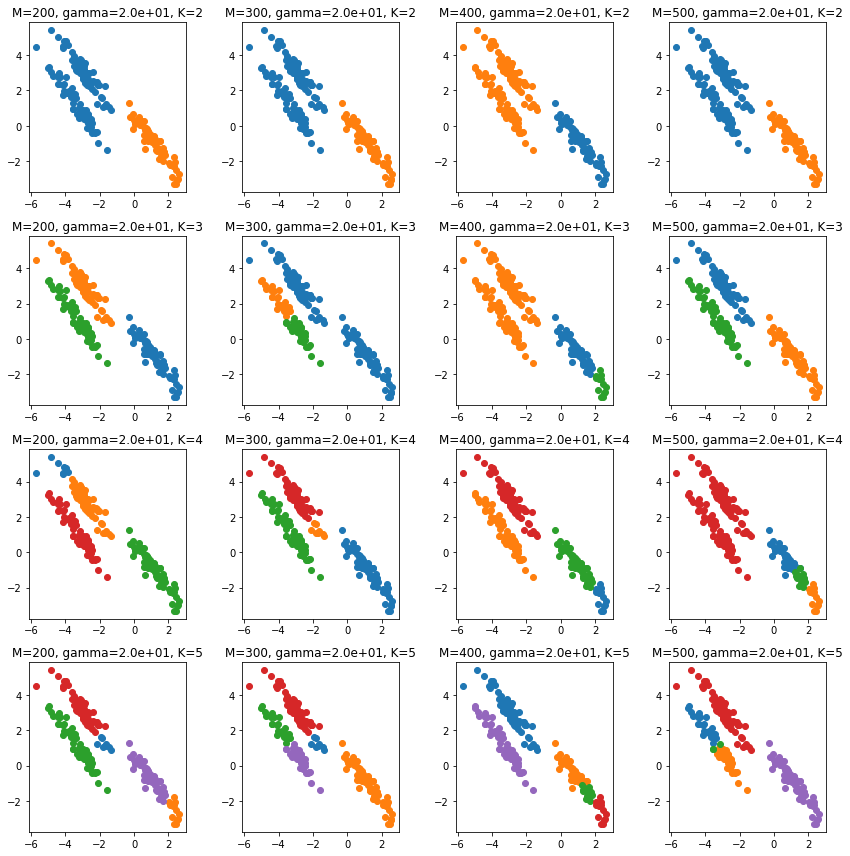

In [ ]:
XX = skinny_blobs[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_M = [200,300,400,500]
gamma = 20

mK = np.empty((len(v_K), len(v_M)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        M = v_M[cc]
        PM = compute_P_M(XX, M=M, gamma = gamma)
        labels_, Q = Learning_Prototypes_Clustering(PM, n_clusters=K)
        y_pred = labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title('M={0:d}, gamma={1:.1e}, K={2:d}'.format(M,gamma,K))

    #aa[rr][cc].legend()
ff.tight_layout()

## Concentric Circumferences

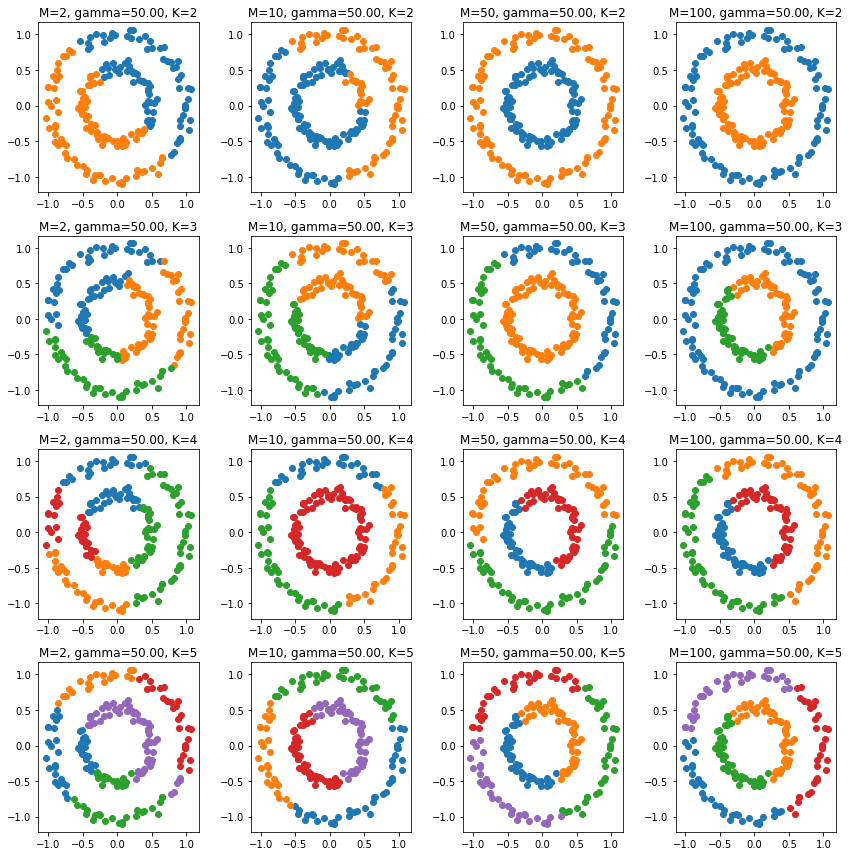

In [ ]:
XX = noisy_circles[0].copy()
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_M = [2,10,50,100]
gamma = 50


mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
  for cc in range(ncols):
    K = v_K[rr]
    M = v_M[cc]
    PM = compute_P_M(XX, M=M, gamma = gamma)
    labels_, Q = Learning_Prototypes_Clustering(PM, n_clusters=K)
    y_pred = labels_
    mK[rr,cc] = len(np.unique(y_pred))
    for k in range(K):
      idx_k = np.where(y_pred==k)[0]
      aa[rr][cc].scatter(XX[idx_k,0], XX[idx_k,1], label='k={0:d}'.format(k))


    aa[rr][cc].set_title('M={0:d}, gamma={1:.2f}, K={2:d}'.format(M,gamma,K))

    #aa[rr][cc].legend()
ff.tight_layout()